<a href="https://colab.research.google.com/github/glng-swndru/TA_Deteksi_APD/blob/main/TA_Deteksi_APD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Kaitkan Google Colab dengan Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd '/content/drive/MyDrive/Deteksi_APD_YOLOv8'

/content/drive/MyDrive/Deteksi_APD_YOLOv8


#**Impor Library yang dibutuhkan**

In [ ]:
# Import modul os untuk membuat variabel bantuan, yang memudahkan kita dalam mengelola berbagai path di kode
import os

In [ ]:
# Import modul glob untuk mengembalikan semua path file yang cocok dengan pola tertentu
import glob

In [ ]:
# Jika kita hanya ingin menampilkan satu gambar, maka modul "Image" sudah cukup, tetapi jika kita ingin menampilkan beberapa gambar hanya dengan menjalankan satu sel
# maka kita perlu mengimpor display dari IPython

from IPython.display import Image, display

In [ ]:
# Untuk membersihkan output di notebook, gunakan fungsi clear_output
#display.clear_output()

# **Langkah Pertama, Kita perlu memeriksa apakah kita memiliki akses ke GPU atau tidak**

In [ ]:
!nvidia-smi

Wed Mar 20 03:26:50 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla V100-SXM2-16GB           Off | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P0              24W / 300W |      0MiB / 16384MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
HOME = os.getcwd()

In [ ]:
print(HOME)

/content/drive/MyDrive/Deteksi_APD_YOLOv8


#**Instalasi Ultralytics menggunakan Pip Install**

#**YOLOv8 dapat diinstal dalam dua cara - dari sumber dan melalui pip. Hal ini karena ini adalah iterasi pertama YOLO yang memiliki paket resmi.**

In [ ]:


# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -qe ultralytics

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [ ]:
!pip install ultralytics

##Memeriksa Apakah YOLOv8 Telah Diinstal dan Berfungsi dengan Baik

In [ ]:
import ultralytics

In [ ]:
ultralytics.checks()

Ultralytics YOLOv8.1.29 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Setup complete ✅ (8 CPUs, 51.0 GB RAM, 29.1/201.2 GB disk)


#**Mengimpor Dataset Deteksi APD dari Roboflow**

In [ ]:
!mkdir {HOME}/datasets


mkdir: cannot create directory ‘/content/drive/MyDrive/Deteksi_APD_YOLOv8/datasets’: File exists


In [ ]:
!pwd

/content/drive/MyDrive/Deteksi_APD_YOLOv8


In [ ]:
%cd {HOME}/datasets


/content/drive/MyDrive/Deteksi_APD_YOLOv8/datasets


In [ ]:
!pwd

/content/drive/MyDrive/Deteksi_APD_YOLOv8/datasets


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="LvKXQdZGDZ8RdVDGDTWG")
project = rf.workspace("objet-detect-yolov5").project("eep_detection-u9bbd")
version = project.version(1)
dataset = version.download("yolov5")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to EEP_Detection-1 in yolov5pytorch:: 100%|██████████| 6482/6482 [00:38<00:00, 168.74it/s]


# **Melatih Model YOLOv8 pada Dataset Kustom**

In [ ]:
%cd {HOME}

/content/drive/MyDrive/Deteksi_APD_YOLOv8


In [ ]:
%cd {dataset.location}

/content/drive/MyDrive/Deteksi_APD_YOLOv8/EEP_Detection-1


If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://v8docs.ultralytics.com/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8n.pt data='/content/drive/MyDrive/Deteksi_APD_YOLOv8/datasets/Deteksi_APD/data.yaml' epochs=170 imgsz=640

/content/drive/MyDrive/Deteksi_APD_YOLOv8
Ultralytics YOLOv8.1.29 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Deteksi_APD_YOLOv8/datasets/Deteksi_APD/data.yaml, epochs=170, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_f

In [ ]:
!ls {HOME}/runs/detect/train4

args.yaml					     R_curve.png	   val_batch0_labels.jpg
confusion_matrix_normalized.png			     results.csv	   val_batch0_pred.jpg
confusion_matrix.png				     results.png	   val_batch1_labels.jpg
events.out.tfevents.1710907808.2393a1cc0bcb.15878.0  train_batch0.jpg	   val_batch1_pred.jpg
F1_curve.png					     train_batch1.jpg	   val_batch2_labels.jpg
labels_correlogram.jpg				     train_batch22720.jpg  val_batch2_pred.jpg
labels.jpg					     train_batch22721.jpg  weights
P_curve.png					     train_batch22722.jpg
PR_curve.png					     train_batch2.jpg


#**Menampilkan Confusion Matrix**

/content/drive/MyDrive/Deteksi_APD_YOLOv8


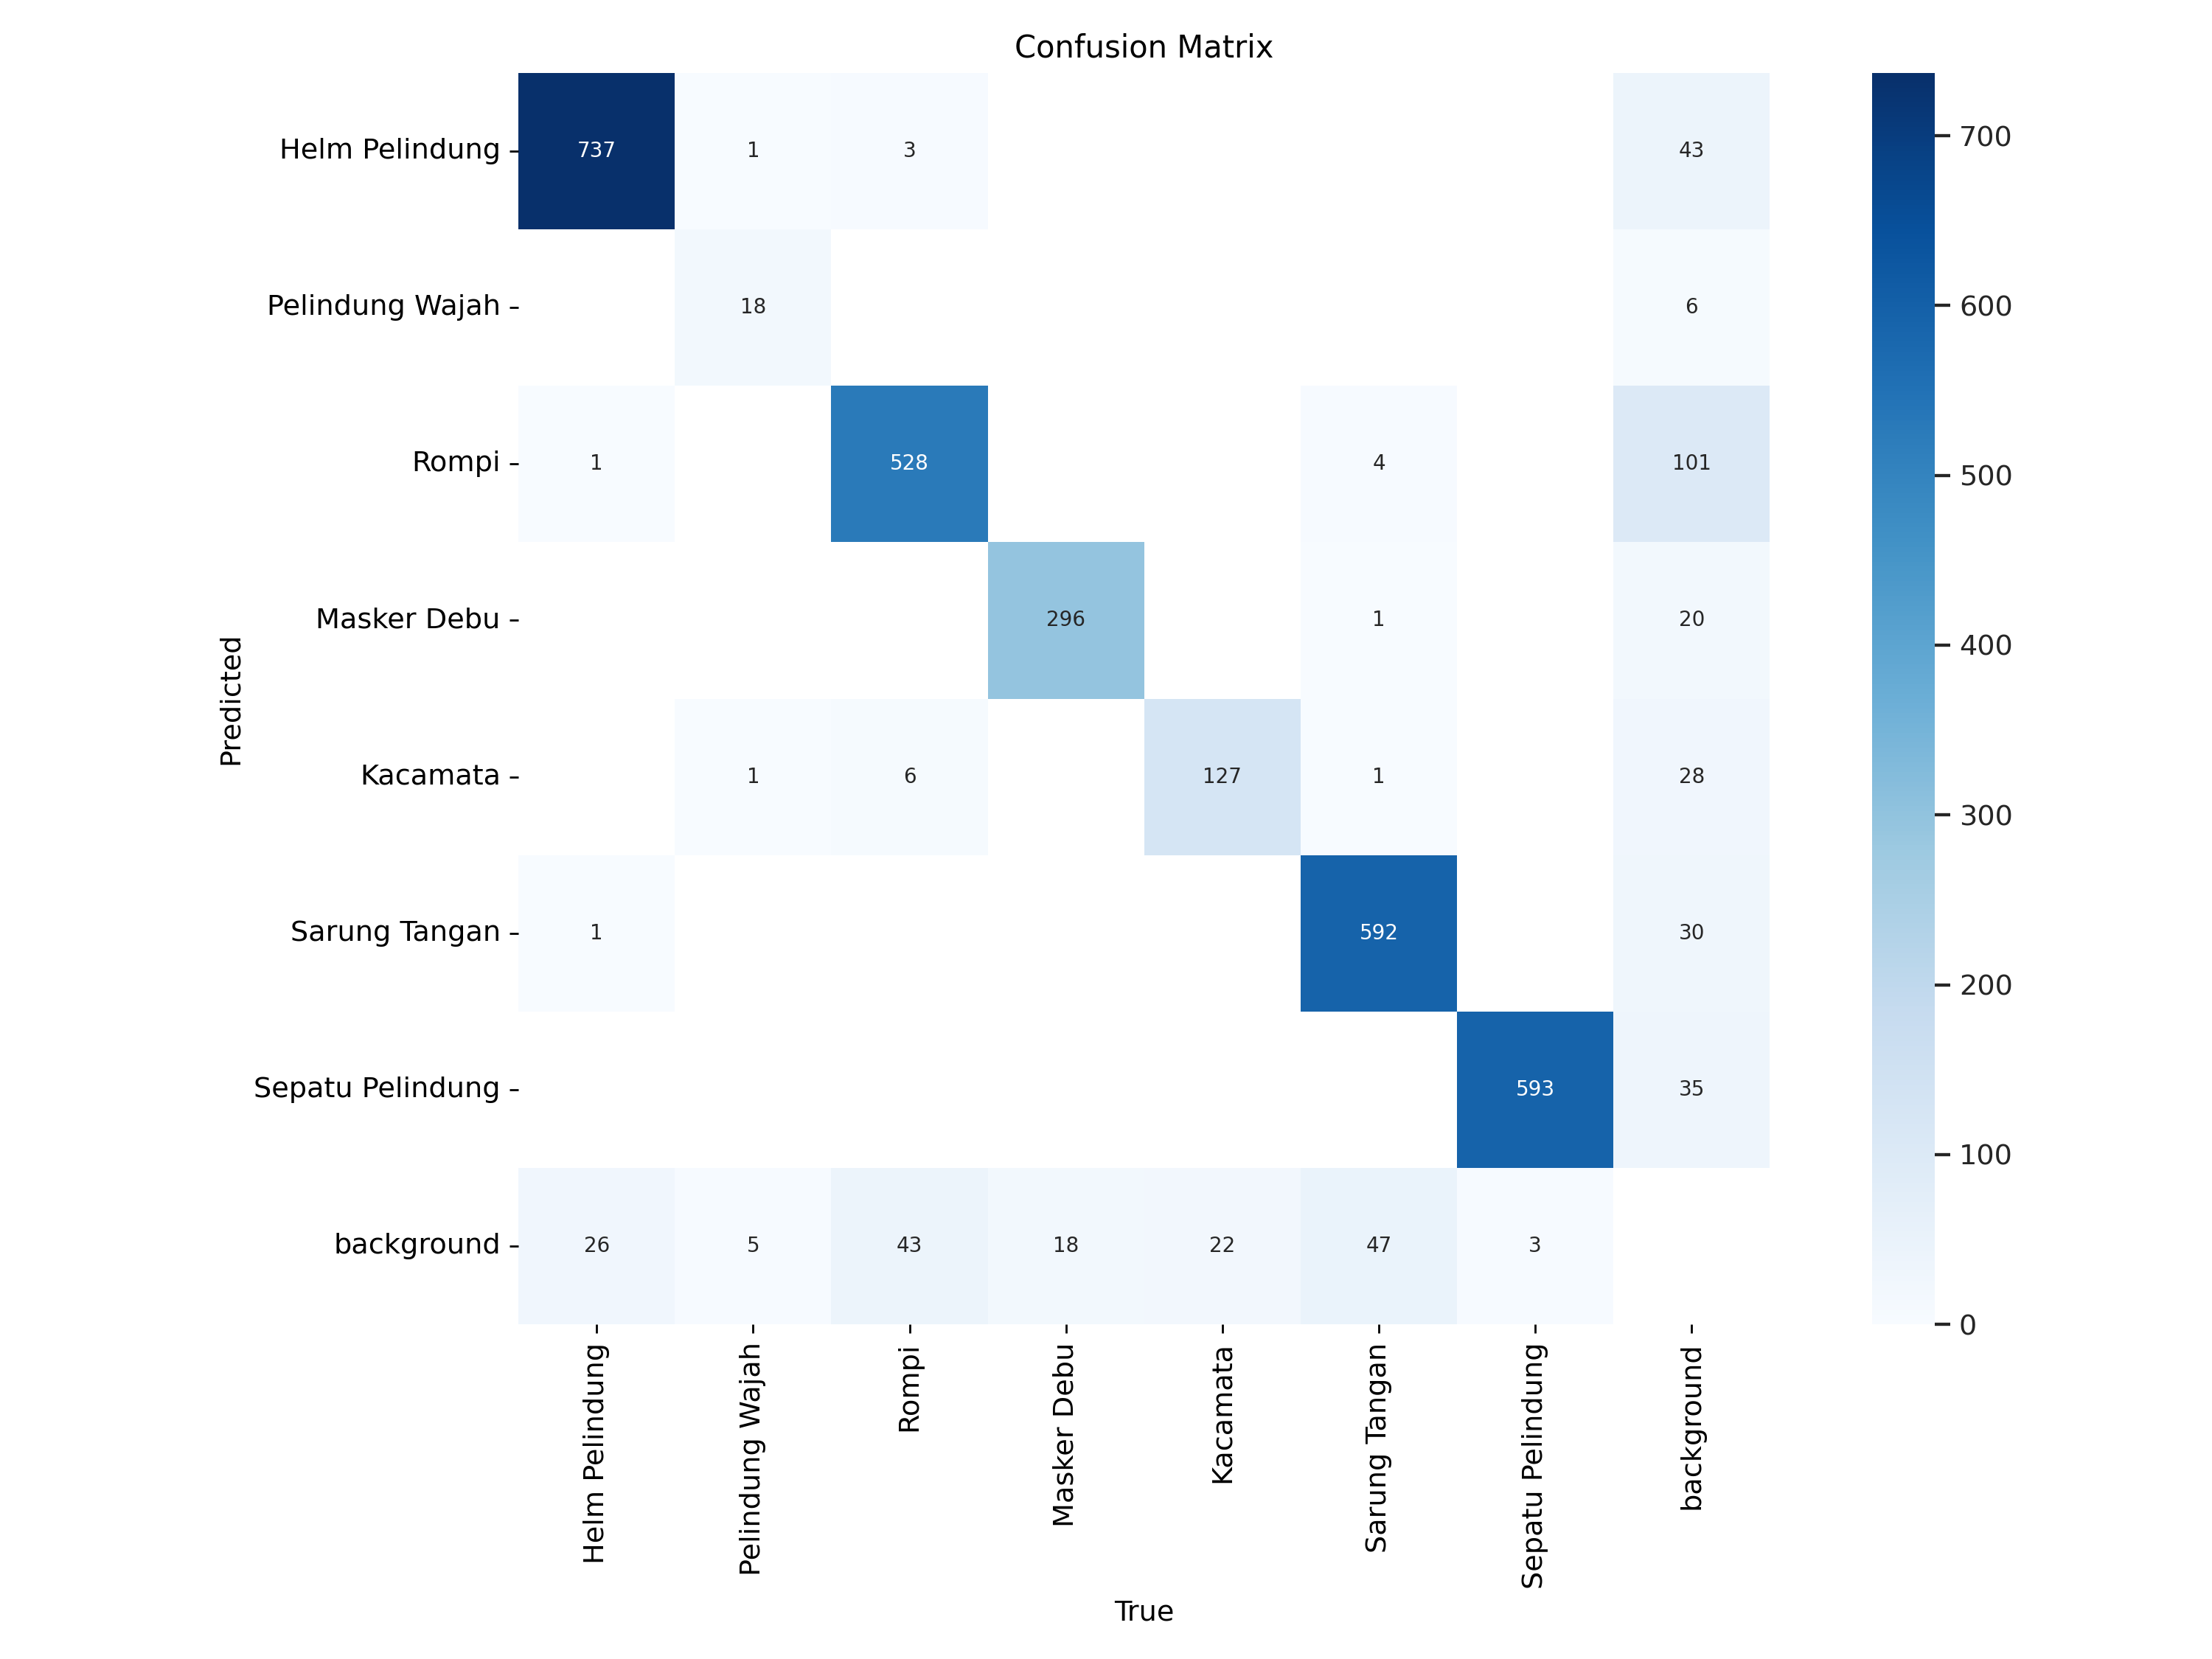

In [ ]:
# Kode di bawah ini menunjukkan cara menampilkan confusion matrix, yang merupakan grafik yang menunjukkan bagaimana model kita menangani berbagai kelas.
# Dalam contoh ini, dinyatakan bahwa 92% dari waktu model berhasil mendeteksi bahwa seseorang mengenakan jaket dengan benar.
# Namun, ada 1% kesalahan di mana bounding box diperoleh tetapi jaket salah diklasifikasikan sebagai kacamata.
# Selain itu, sekitar 7% waktu ketika seseorang mengenakan jaket, model tidak dapat mendeteksinya.
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train4/confusion_matrix.png', width=900)

#**Training and Validation Loss**

/content/drive/MyDrive/Deteksi_APD_YOLOv8


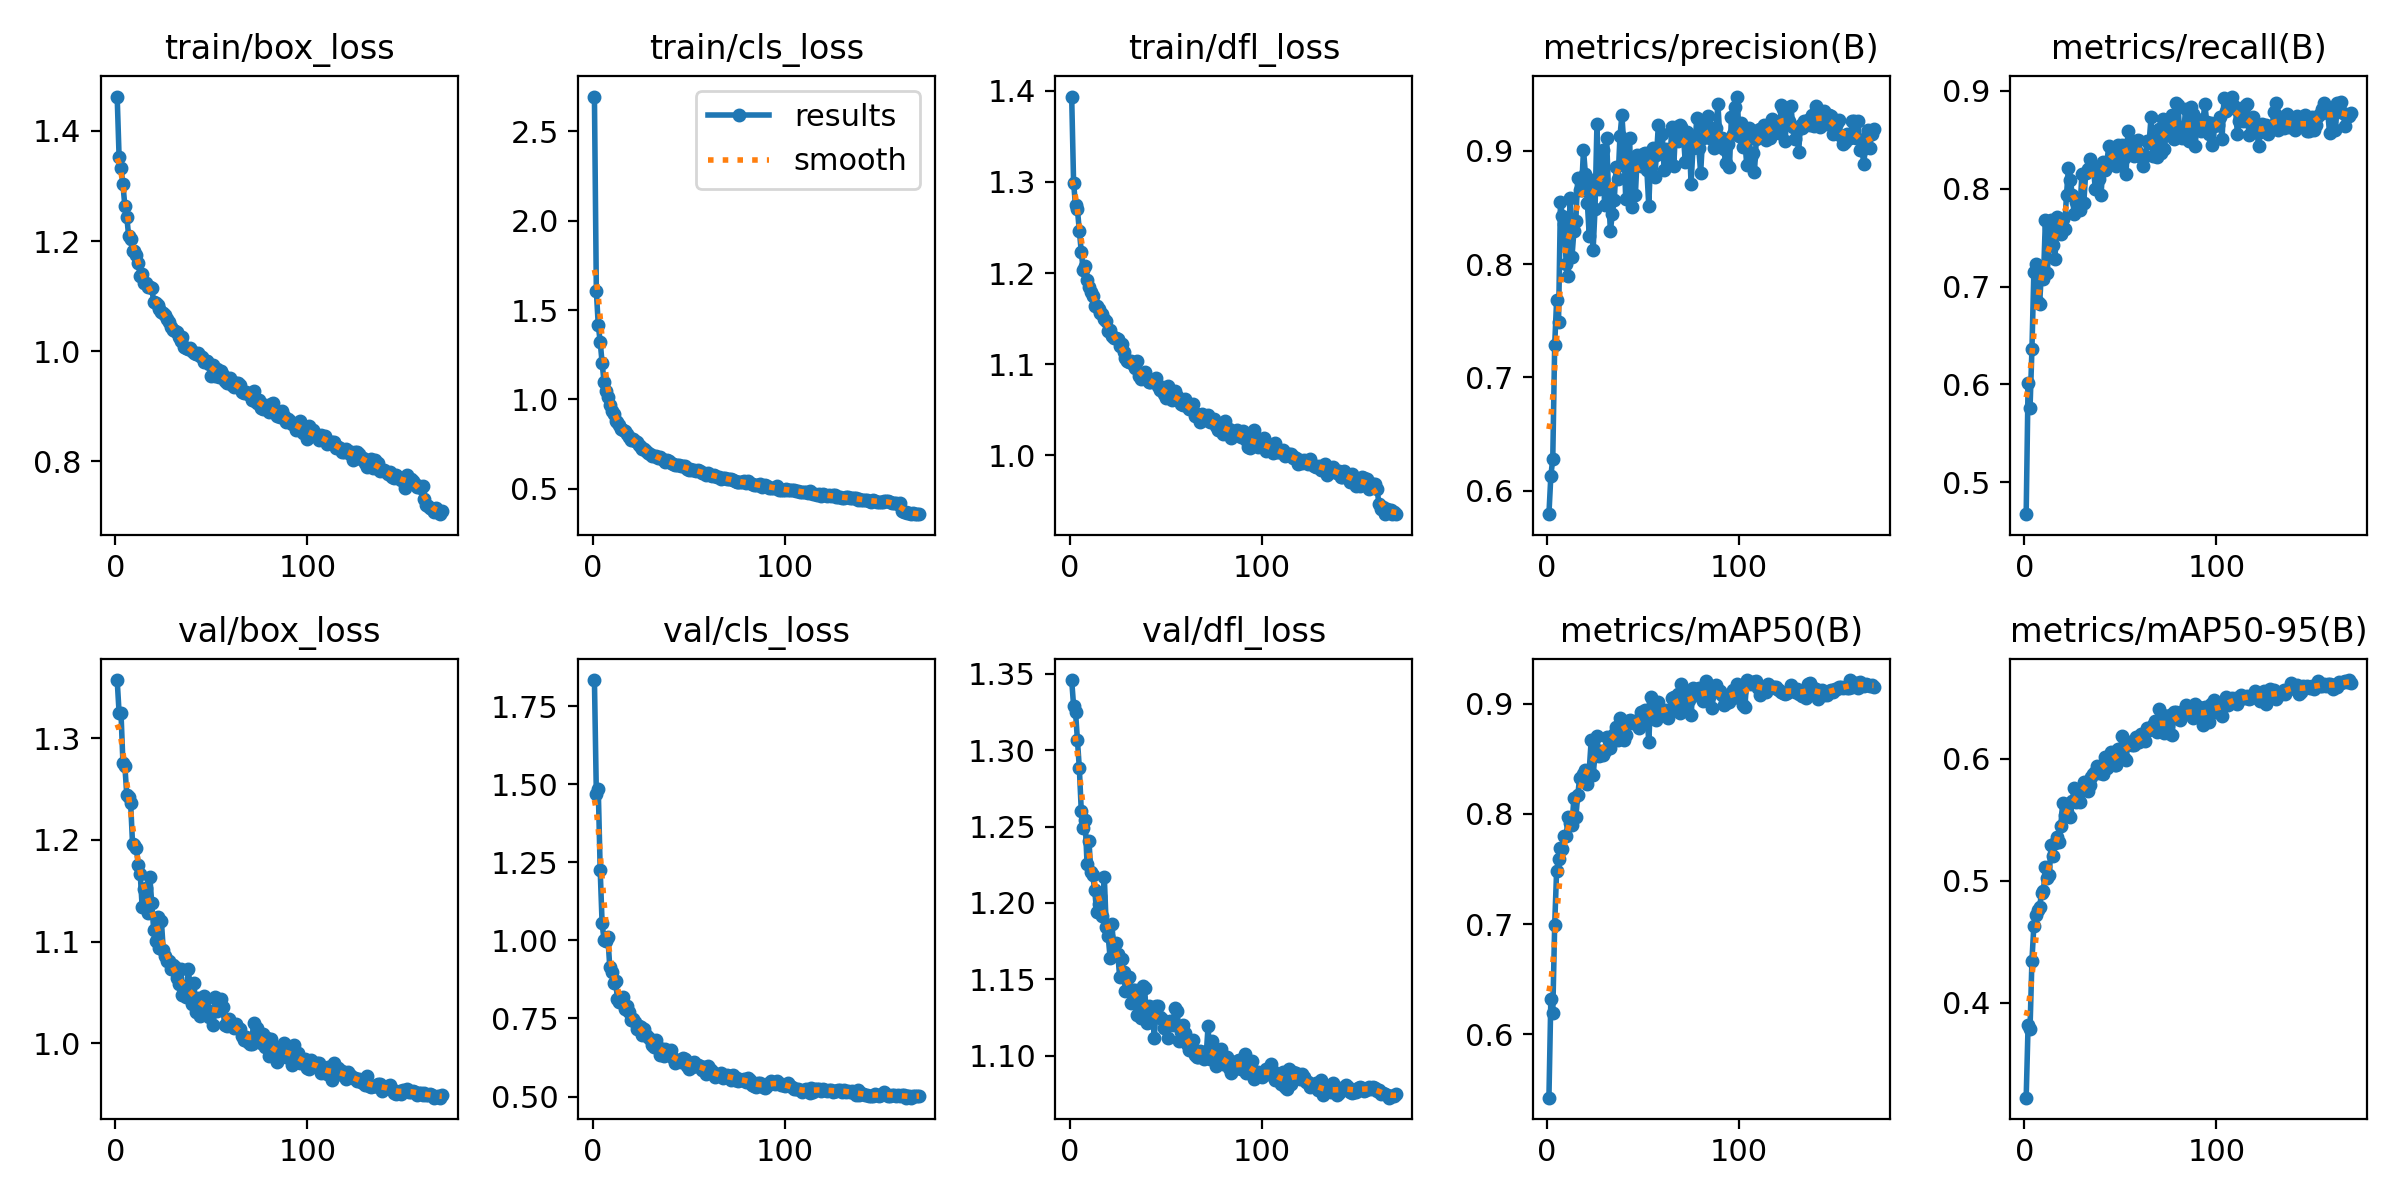

In [ ]:
# Kode di bawah ini menunjukkan cara menampilkan grafik dari kerugian (loss) pelatihan dan validasi.
# Kerugian kotak (box loss) dan kerugian kelas (class loss) adalah hal penting yang ditampilkan.
# Perilaku model terlihat meyakinkan, menunjukkan bahwa model tersebut sedang konvergen. Melakukan pelatihan lebih lanjut kemungkinan akan menghasilkan hasil yang lebih baik.
%cd {HOME}

Image(filename=f'{HOME}/runs/detect/train4/results.png', width=600)

/content/drive/MyDrive/Deteksi_APD_YOLOv8


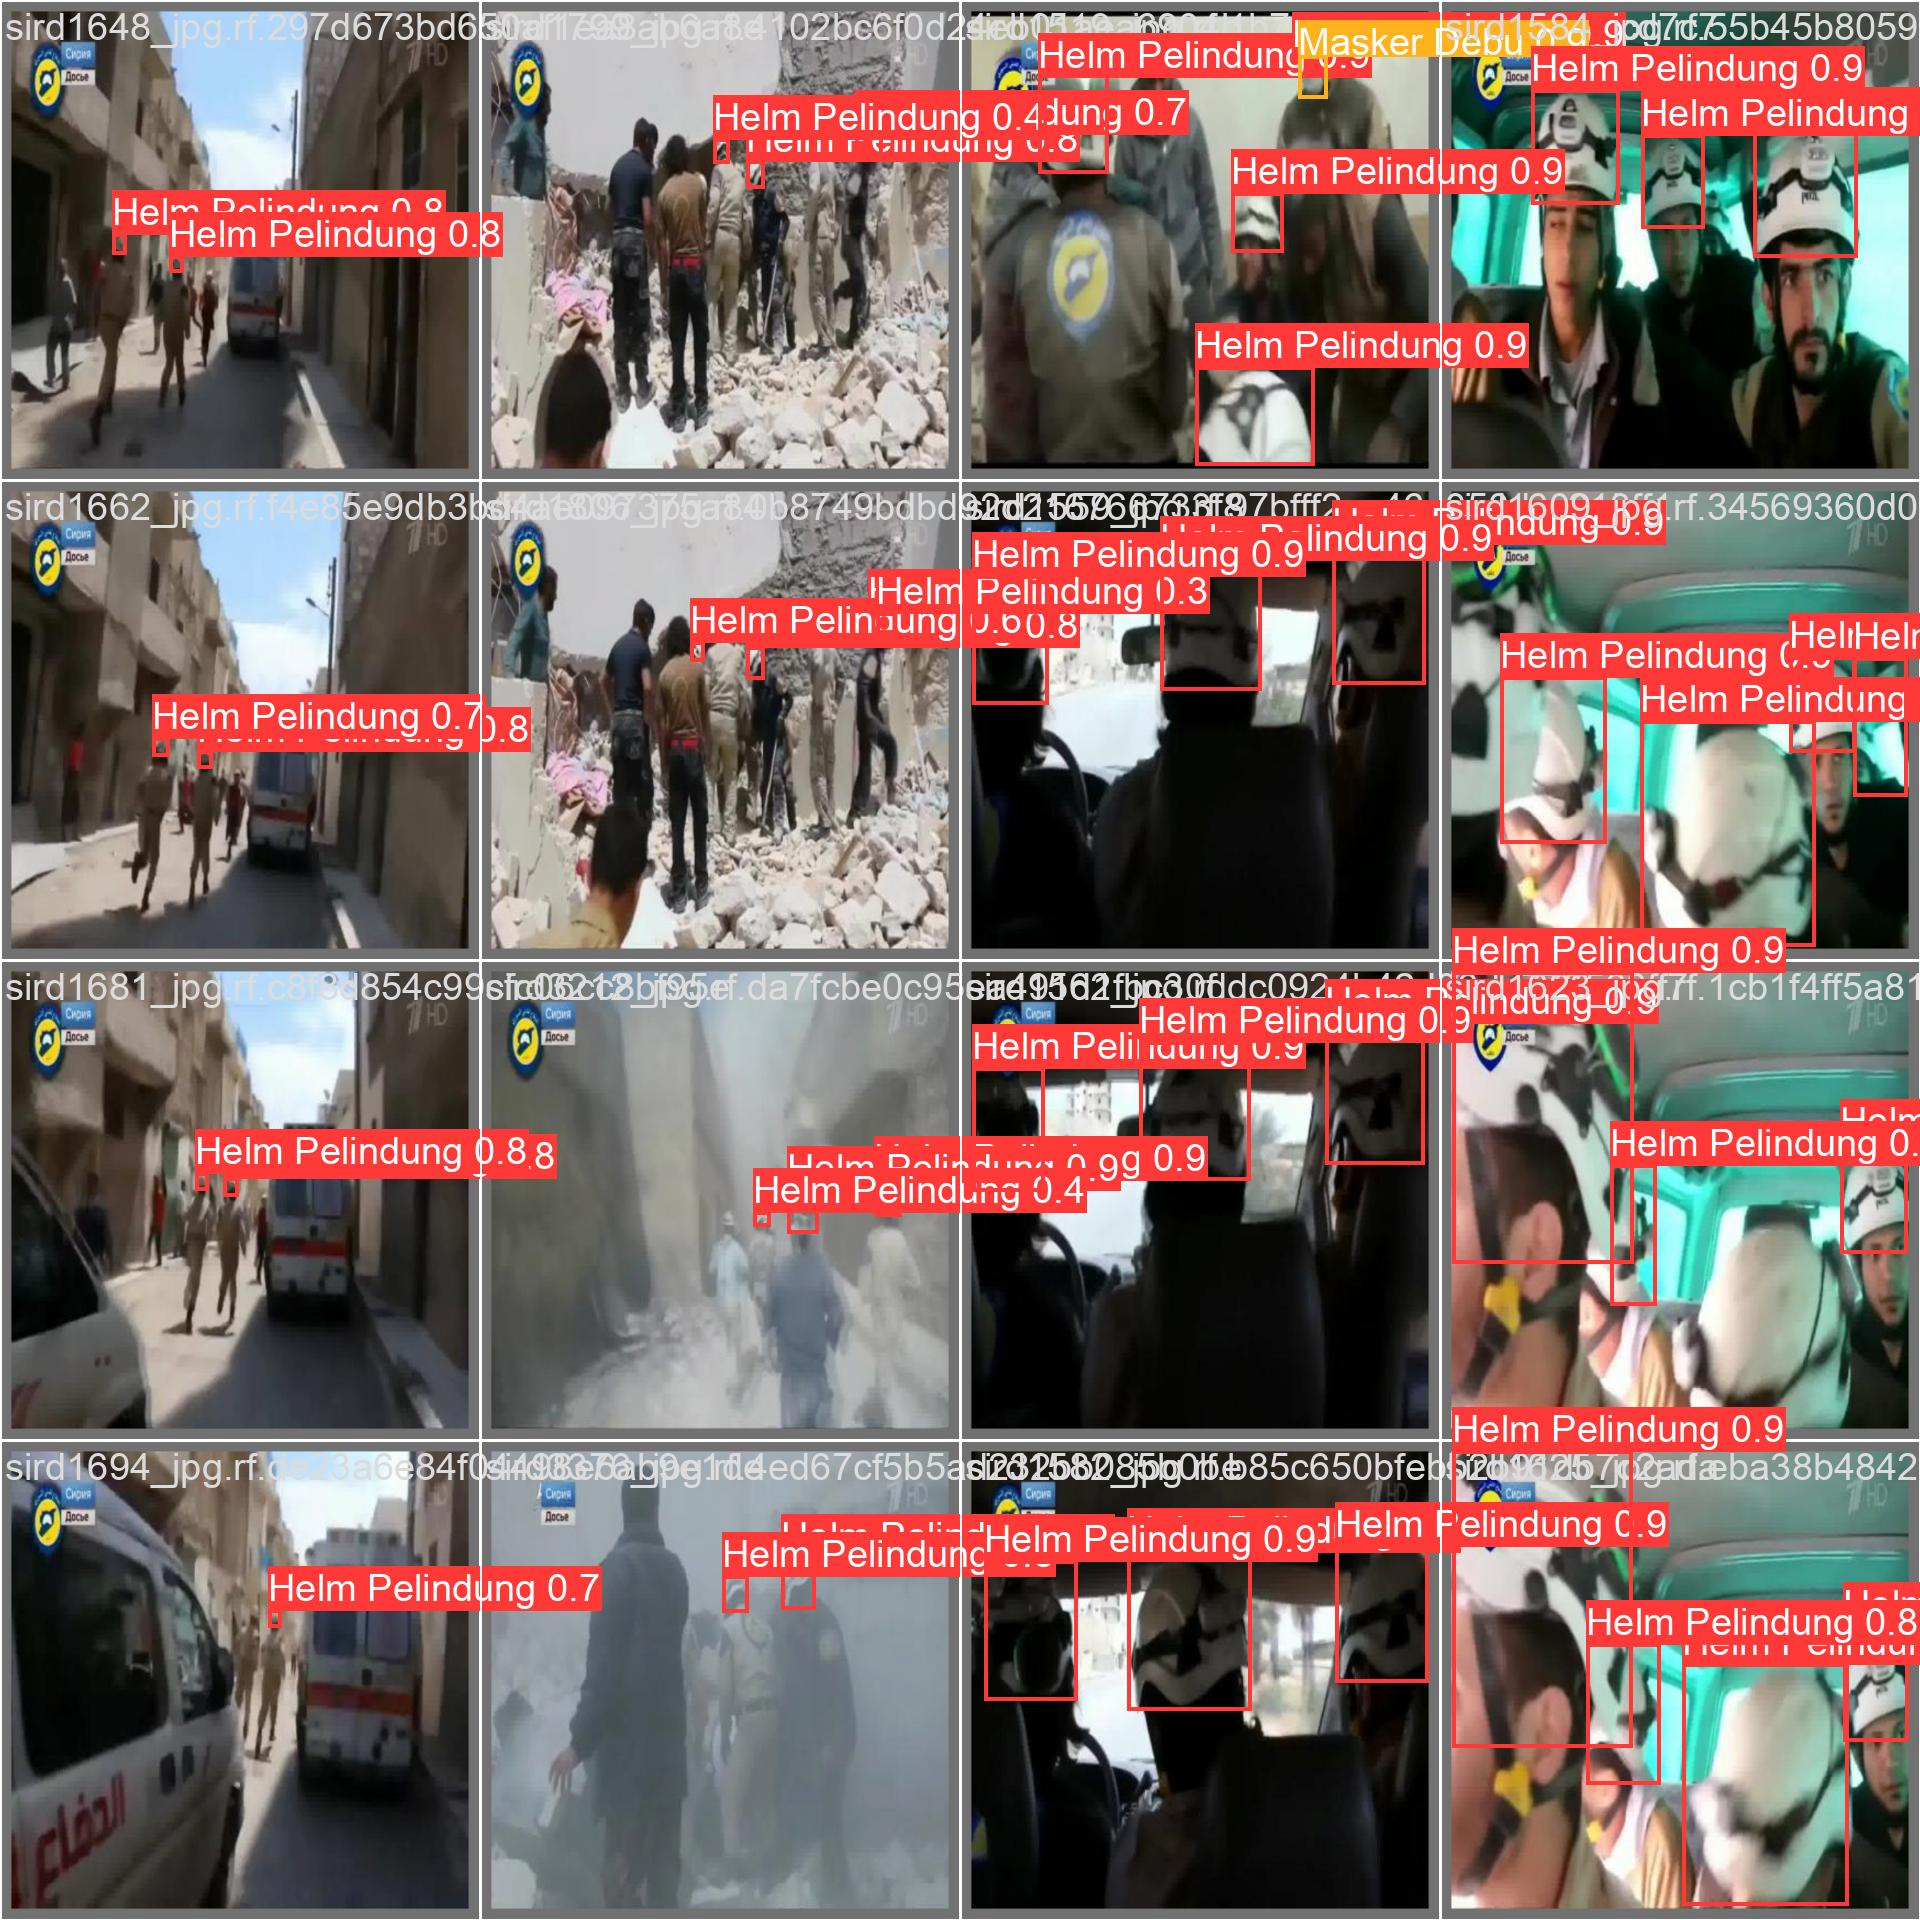

In [ ]:
# Kode di bawah ini menunjukkan prediksi model pada batch validasi. Gambar-gambar ini tidak digunakan secara ketat untuk pelatihan,
# jadi selalu lebih baik untuk melihat dan melihat bagaimana perilaku model.
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train4/val_batch0_pred.jpg', width=600)

#**Validasi Model Kustom**

In [ ]:
# Di sini, kita menggunakan bobot terbaik dari model dan menggunakannya untuk memvalidasi model.
# Secara mirip seperti sebelumnya, kita menggunakan CLI untuk melakukannya.
# Satu-satunya perbedaan adalah mode kita adalah val (validasi) daripada train (pelatihan).
%cd {HOME}
!yolo task=detect mode=val model={HOME}/runs/detect/train4/weights/best.pt data='/content/drive/MyDrive/Deteksi_APD_YOLOv8/datasets/Deteksi_APD/data.yaml'

/content/drive/MyDrive/Deteksi_APD_YOLOv8
Ultralytics YOLOv8.1.29 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Model summary (fused): 168 layers, 3007013 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/drive/MyDrive/Deteksi_APD_YOLOv8/datasets/Deteksi_APD/valid/labels.cache... 647 images, 0 backgrounds, 0 corrupt: 100% 647/647 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 41/41 [00:08<00:00,  4.68it/s]
                   all        647       3074      0.916      0.876      0.917      0.664
        Helm Pelindung        647        765      0.958      0.953      0.982      0.788
       Pelindung Wajah        647         25      0.781      0.715      0.751      0.475
                 Rompi        647        580      0.896      0.889      0.937      0.746
           Masker Debu        647        314      0.955      0.917      0.955      0.704
              Kacamata        647        1

#**Inferensi dengan Model Kustom**

In [ ]:
# Inferensi adalah prediksi yang dapat kita jalankan pada sebuah gambar untuk mendeteksi label,
# baik itu klasifikasi, kotak pembatas (bounding box), atau segmentasi
# Menguji Model pada Gambar Dataset Uji
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train4/weights/best.pt conf=0.25 source={HOME}/datasets/Deteksi_APD/test/images

/content/drive/MyDrive/Deteksi_APD_YOLOv8
Ultralytics YOLOv8.1.29 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Model summary (fused): 168 layers, 3007013 parameters, 0 gradients, 8.1 GFLOPs

image 1/324 /content/drive/MyDrive/Deteksi_APD_YOLOv8/datasets/Deteksi_APD/test/images/000446_jpg.rf.ae946a1122b8eaac534a4954f07b3755.jpg: 640x640 1 Helm Pelindung, 1 Masker Debu, 2 Sarung Tangans, 8.0ms
image 2/324 /content/drive/MyDrive/Deteksi_APD_YOLOv8/datasets/Deteksi_APD/test/images/20220721_161946_jpg.rf.149c26cf563aa2ace0bdc099c4af8fef.jpg: 640x640 1 Helm Pelindung, 7.0ms
image 3/324 /content/drive/MyDrive/Deteksi_APD_YOLOv8/datasets/Deteksi_APD/test/images/20220721_162015_jpg.rf.f71cba1429b26a3c95b6f8706ea69853.jpg: 640x640 (no detections), 6.4ms
image 4/324 /content/drive/MyDrive/Deteksi_APD_YOLOv8/datasets/Deteksi_APD/test/images/20220721_162036_jpg.rf.f6b8fdbdef55ce36cd4ad61549b2c1e2.jpg: 640x640 1 Masker Debu, 10.5ms
image 5/324 /content/drive/MyDrive/Det

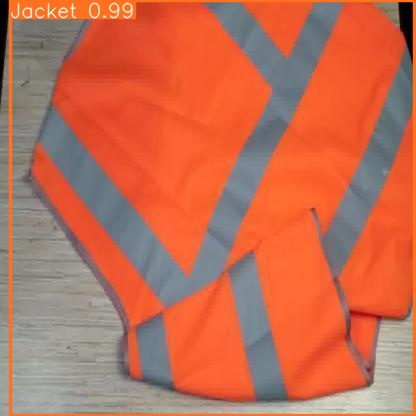

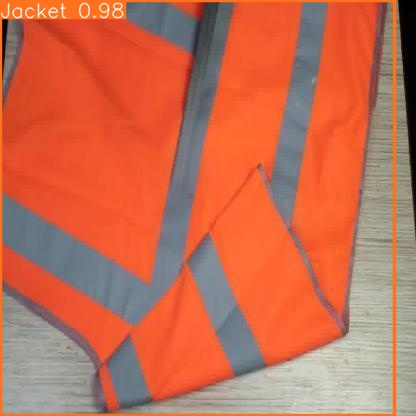

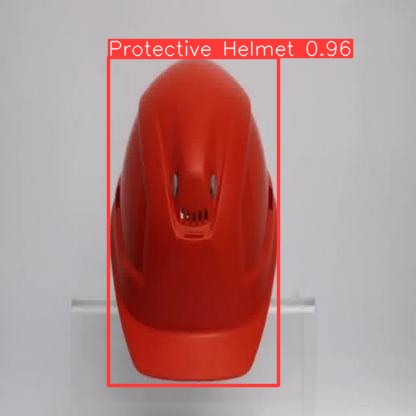

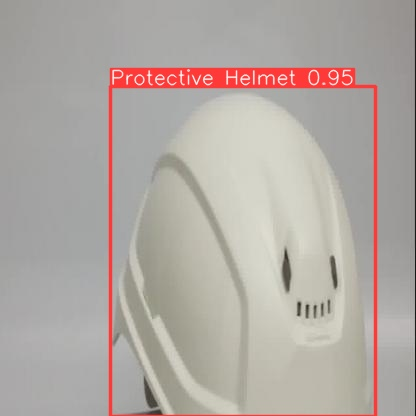

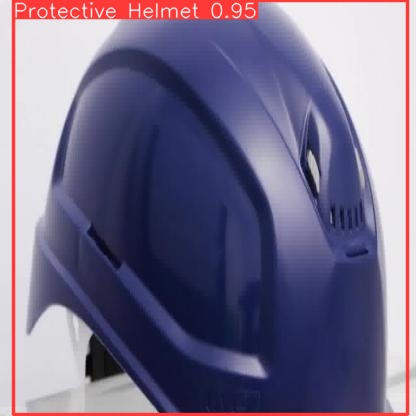

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[25:30]:
      display(Image(filename=image_path, width=600))
      print("\n")

#**Testing di Demo Video**

In [ ]:
!gdown "https://drive.google.com/uc?id=1crFwrpMF1OlaJ0ZCZjBNRo9llLEVR8VQ&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1crFwrpMF1OlaJ0ZCZjBNRo9llLEVR8VQ&confirm=t
To: /content/drive/MyDrive/Deteksi_APD_YOLOv8/demo.mp4
100% 42.9M/42.9M [00:00<00:00, 194MB/s]


In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train4/weights/best.pt conf=0.25 source={HOME}/demo.mp4

/content/drive/MyDrive/Deteksi_APD_YOLOv8
Ultralytics YOLOv8.1.29 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Model summary (fused): 168 layers, 3007013 parameters, 0 gradients, 8.1 GFLOPs

video 1/1 (frame 1/439) /content/drive/MyDrive/Deteksi_APD_YOLOv8/demo.mp4: 384x640 2 Helm Pelindungs, 2 Rompis, 2 Sarung Tangans, 89.9ms
video 1/1 (frame 2/439) /content/drive/MyDrive/Deteksi_APD_YOLOv8/demo.mp4: 384x640 2 Helm Pelindungs, 2 Rompis, 2 Sarung Tangans, 6.8ms
video 1/1 (frame 3/439) /content/drive/MyDrive/Deteksi_APD_YOLOv8/demo.mp4: 384x640 2 Helm Pelindungs, 2 Rompis, 1 Sarung Tangan, 7.1ms
video 1/1 (frame 4/439) /content/drive/MyDrive/Deteksi_APD_YOLOv8/demo.mp4: 384x640 2 Helm Pelindungs, 2 Rompis, 1 Sarung Tangan, 6.6ms
video 1/1 (frame 5/439) /content/drive/MyDrive/Deteksi_APD_YOLOv8/demo.mp4: 384x640 2 Helm Pelindungs, 2 Rompis, 1 Sarung Tangan, 10.7ms
video 1/1 (frame 6/439) /content/drive/MyDrive/Deteksi_APD_YOLOv8/demo.mp4: 384x640 2 Helm Peli

#**Menampilkan Demo Video**

In [ ]:
!rm "/content/result_compressed.mp4"

rm: cannot remove '/content/result_compressed.mp4': No such file or directory


In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/drive/MyDrive/Deteksi_APD_YOLOv8/runs/detect/predict3/demo.avi'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

#**Downloading Demo Video2**

In [ ]:
!gdown "https://drive.google.com/uc?id=1cTIBNQ1R_7JAOURVv9cJ6P935ym_IkZ0&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1cTIBNQ1R_7JAOURVv9cJ6P935ym_IkZ0&confirm=t
To: /content/drive/MyDrive/Deteksi_APD_YOLOv8/demo3.mp4
100% 20.3M/20.3M [00:00<00:00, 41.3MB/s]


#**Testing di Demo Video**

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train4/weights/best.pt conf=0.25 source= {HOME}/demo3.mp4

/content/drive/MyDrive/Deteksi_APD_YOLOv8
Ultralytics YOLOv8.1.29 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Model summary (fused): 168 layers, 3007013 parameters, 0 gradients, 8.1 GFLOPs

video 1/1 (frame 1/219) /content/drive/MyDrive/Deteksi_APD_YOLOv8/demo3.mp4: 384x640 2 Helm Pelindungs, 2 Rompis, 93.6ms
video 1/1 (frame 2/219) /content/drive/MyDrive/Deteksi_APD_YOLOv8/demo3.mp4: 384x640 2 Helm Pelindungs, 2 Rompis, 6.9ms
video 1/1 (frame 3/219) /content/drive/MyDrive/Deteksi_APD_YOLOv8/demo3.mp4: 384x640 2 Helm Pelindungs, 2 Rompis, 7.0ms
video 1/1 (frame 4/219) /content/drive/MyDrive/Deteksi_APD_YOLOv8/demo3.mp4: 384x640 2 Helm Pelindungs, 2 Rompis, 10.6ms
video 1/1 (frame 5/219) /content/drive/MyDrive/Deteksi_APD_YOLOv8/demo3.mp4: 384x640 2 Helm Pelindungs, 2 Rompis, 6.6ms
video 1/1 (frame 6/219) /content/drive/MyDrive/Deteksi_APD_YOLOv8/demo3.mp4: 384x640 2 Helm Pelindungs, 2 Rompis, 6.6ms
video 1/1 (frame 7/219) /content/drive/MyDrive/Deteksi_AP

#**Menampilkan Demo Video**

In [ ]:
!rm "/content/result_compressed.mp4"

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/drive/MyDrive/Deteksi_APD_YOLOv8/runs/detect/predict4/demo3.avi'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

#**Downloading Demo Video3**

In [ ]:
!gdown "https://drive.google.com/uc?id=1256pNK0nQnEDT6FRLQAraTRkOY7BSprq&confirm=t"

#**Testing di Demo Video**

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={HOME}/demo4.mp4

#**Menampilkan Demo Video**

In [ ]:
!rm "/content/result_compressed.mp4"

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/drive/MyDrive/PPE_Detection_YOLOv8/runs/detect/predict4/demo4.avi'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)